In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the datasets
tips_df = pd.read_csv('/kaggle/input/most-viewed-hindi-music-videos-on-youtube/tipsofficial_top_videos.csv')
tseries_df = pd.read_csv('/kaggle/input/most-viewed-hindi-music-videos-on-youtube/tseries_top_videos.csv')
zee_df = pd.read_csv('/kaggle/input/most-viewed-hindi-music-videos-on-youtube/zeemusiccompany_top_videos.csv')

# Merge the datasets
merged_df = pd.concat([tips_df, tseries_df, zee_df], ignore_index=True)

# Display the merged dataset
merged_df.head()


,channel,title,published_at,duration,view_count,like_count,comment_count
0,Tips Official,"Tera Fitoor Lyrical - Genius | Utkarsh Sharma,...",2018-07-17T11:04:57Z,PT5M34S,789713802,4107077,161740
1,Tips Official,Dil Meri Na Sune Lyrical - Genius | Utkarsh Sh...,2018-08-03T07:30:11Z,PT4M22S,779518828,4206855,170804
2,Tips Official,Jeene Laga Hoon Lyrical - Ramaiya Vastavaiya|G...,2013-07-29T05:28:27Z,PT3M22S,598594500,3271158,79266
3,Tips Official,Kasam Khake Kaho | Dil Hai Tumhaara | Preity Z...,2009-12-09T07:49:01Z,PT5M21S,338669778,966511,23811
4,Tips Official,"Chamma Chamma | Fraud Saiyaan | Elli AvrRam, A...",2019-01-15T09:31:45Z,PT3M40S,319369057,1592186,37632


In [2]:
# Check for duplicates
duplicate_rows = merged_df.duplicated()

# Display duplicated rows
print("Duplicate Rows except first occurrence:")
print(merged_df[duplicate_rows])

# Remove duplicates
merged_df = merged_df.drop_duplicates()

# Display the cleaned dataset
print("Cleaned Dataset after removing duplicates:")
print(merged_df.head())

Duplicate Rows except first occurrence:
           channel                                              title  \
298  Tips Official  Yaadein Jukebox - Full Album Songs | Hrithik R...   
299  Tips Official  Yaadein Yaad Aati Hai Lyrical | Yaadein | Hrit...   
300  Tips Official  Ramta Jogi Gaata Hai | Shameer Tandon | Sameer...   
497  Tips Official  Ishwar Ka Vo Sacha Banda {TEASER} Sonu Nigam |...   
498  Tips Official  Ranjha Ranjha Karte Karte - Lyrical | Heer Ran...   
499  Tips Official  Mumkin Hai Bahar Full Video - Bol | Atif Aslam...   
500  Tips Official  Chanchal Hawaon Se - Lyrical | Rishi Kapoor | ...   
501  Tips Official  Sabki Baaratein Aayi - Teaser | Zaara Yesmin &...   
502  Tips Official  Ishqbaaziyaan Lyrical - Happy Hardy And Heer |...   

             published_at  duration  view_count like_count  comment_count  
298  2014-02-24T06:23:10Z  PT55M53S     3393359      15325            511  
299  2022-01-08T05:30:13Z   PT5M18S     3402915      30352            675  
3

In [3]:
# Display summary statistics
print("Summary Statistics:")
print(merged_df[['view_count', 'like_count', 'comment_count', 'duration']].describe())


Summary Statistics:
         view_count  comment_count
count  1.658000e+03    1658.000000
mean   9.907156e+07   17835.148372
std    1.777312e+08   37017.239435
min    1.758000e+03       0.000000
25%    2.994026e+06     550.500000
50%    2.375875e+07    4061.000000
75%    1.216490e+08   19068.500000
max    1.561023e+09  418830.000000


**How to visualize the distribution of views across different channels?**

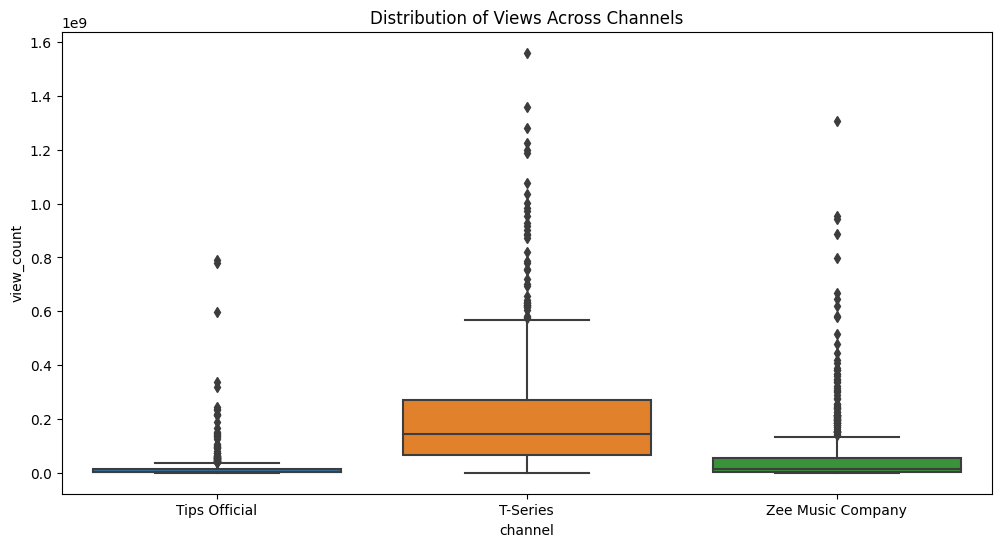

In [4]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='channel', y='view_count', data=merged_df)
plt.title('Distribution of Views Across Channels')
plt.show()


**How to visualize the trend of view counts over time?**

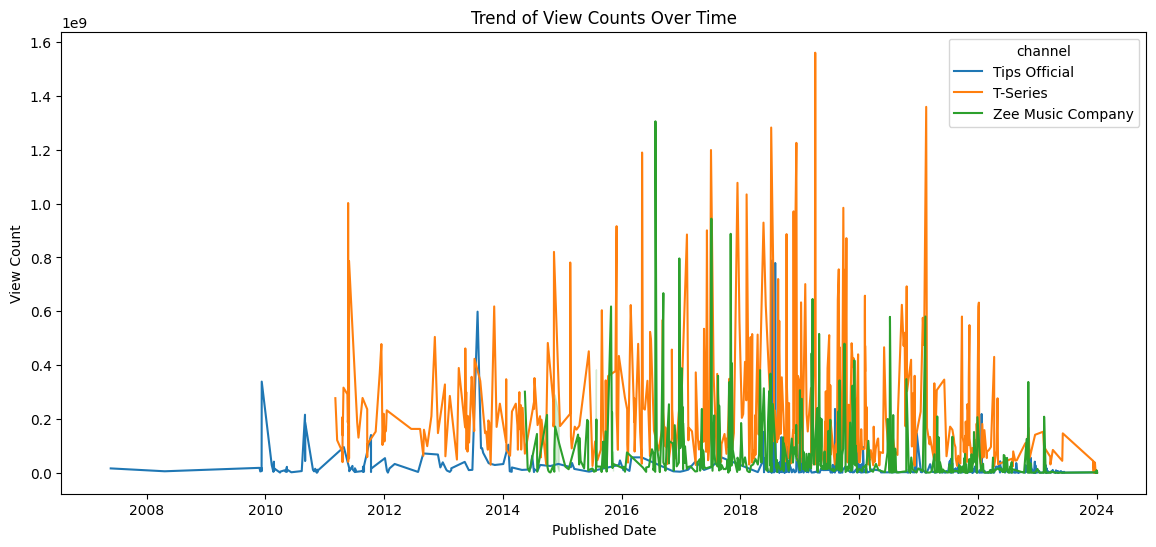

In [5]:
# Convert 'published_at' to datetime
merged_df['published_at'] = pd.to_datetime(merged_df['published_at'])

# Set up the time series plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='published_at', y='view_count', data=merged_df, hue='channel')
plt.title('Trend of View Counts Over Time')
plt.xlabel('Published Date')
plt.ylabel('View Count')
plt.show()


**How to create a bar chart to show the top 10 most viewed videos?**

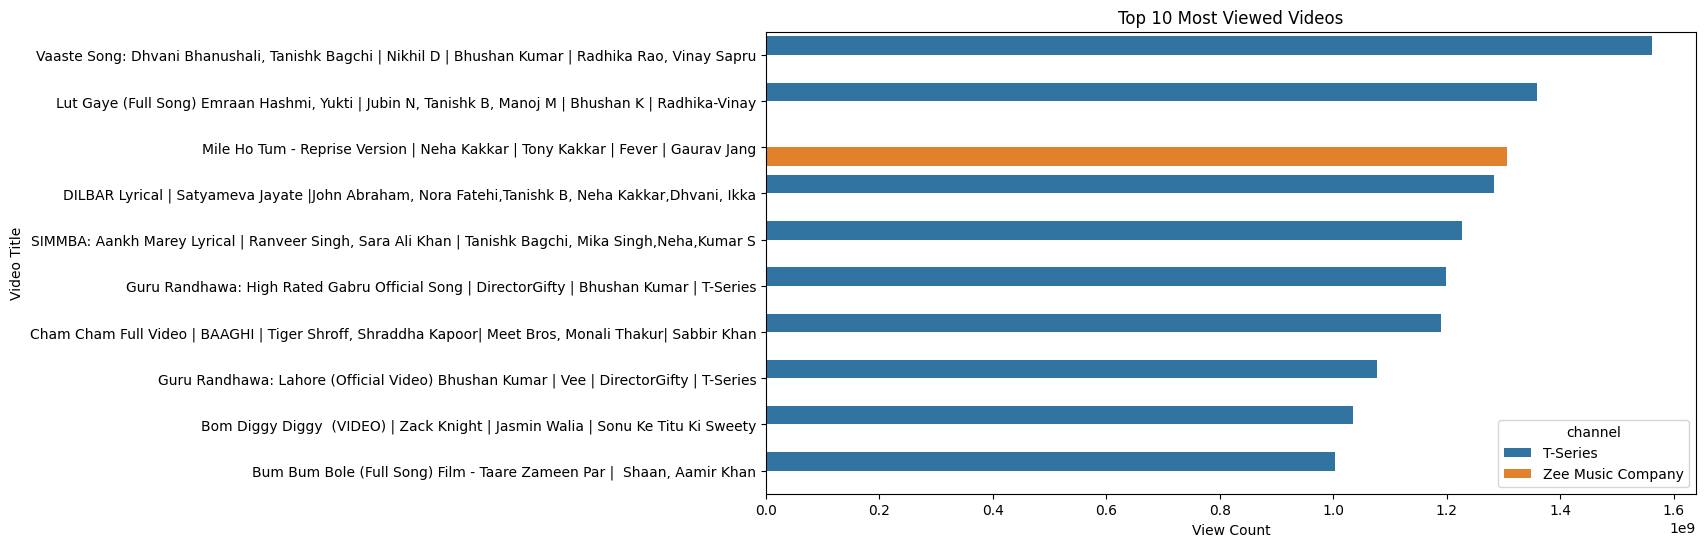

In [6]:
# Sort the dataset by view_count in descending order
top_viewed_videos = merged_df.sort_values(by='view_count', ascending=False).head(10)

# Set up the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='view_count', y='title', data=top_viewed_videos, hue='channel', dodge=True)
plt.title('Top 10 Most Viewed Videos')
plt.xlabel('View Count')
plt.ylabel('Video Title')
plt.show()


**How to use Plotly to create an interactive scatter plot of likes vs views?**

In [7]:
# Import Plotly library
import plotly.express as px

# Set up the interactive scatter plot
fig = px.scatter(merged_df, x='like_count', y='view_count', color='channel', hover_data=['title'])
fig.update_layout(title='Interactive Scatter Plot of Likes vs Views')
fig.show()


**How to visualize the distribution of video durations?**

In [8]:
import plotly.express as px
import plotly.io as pio

# Assuming merged_df is your DataFrame
fig = px.histogram(merged_df, x='duration', nbins=20, marginal='rug',
                   labels={'duration': 'Duration (seconds)', 'count': 'Frequency'},
                   title='Distribution of Video Durations')

# Show the figure
fig.show()


**How to create a geographic map using Folium to show the distribution of view counts by region?**

In [9]:
# Import Folium library
import folium

# Group by channel and sum the view counts
channel_view_counts = merged_df.groupby('channel')['view_count'].sum().reset_index()

# Create a Folium map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for index, row in channel_view_counts.iterrows():
    folium.Marker(location=[np.random.uniform(10, 40), np.random.uniform(70, 90)],
                  popup=f"{row['channel']}: {row['view_count']}",
                  icon=folium.Icon(color='blue')).add_to(m)

m.save('channel_view_counts_map.html')


In [10]:
from IPython.display import IFrame

IFrame('channel_view_counts_map.html', width=800, height=500)

**How to use Plotly to create a bar chart for the total view counts of each channel?**

In [11]:
# Import Plotly library
import plotly.express as px

# Group by channel and sum the view counts
channel_total_views = merged_df.groupby('channel')['view_count'].sum().reset_index()

# Create a Plotly bar chart
fig = px.bar(channel_total_views, x='channel', y='view_count', color='channel',
             labels={'view_count': 'Total View Count'}, title='Total View Counts by Channel')
fig.show()


**How to create a donut chart to visualize the distribution of videos across channels?**

In [12]:
# Create a donut chart using Plotly
fig = px.pie(merged_df, names='channel', hole=0.4,
             title='Distribution of Videos Across Channels')
fig.show()


**How to use Seaborn to create a pair plot for numerical variables?**

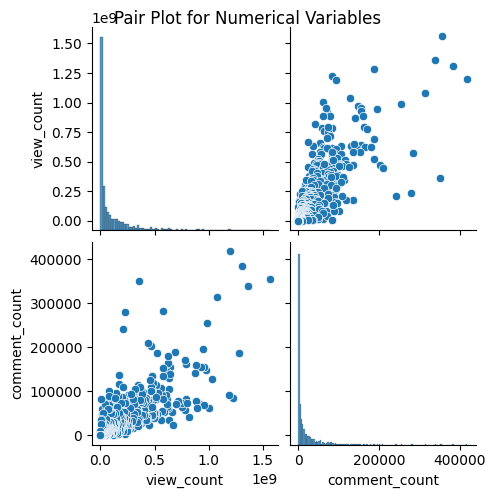

In [13]:
# Select numerical columns for the pair plot
numerical_columns = ['view_count', 'like_count', 'comment_count', 'duration']

# Create a pair plot using Seaborn
sns.pairplot(merged_df[numerical_columns])
plt.suptitle('Pair Plot for Numerical Variables')
plt.show()


**How to visualize the distribution of views using a Violin plot?**

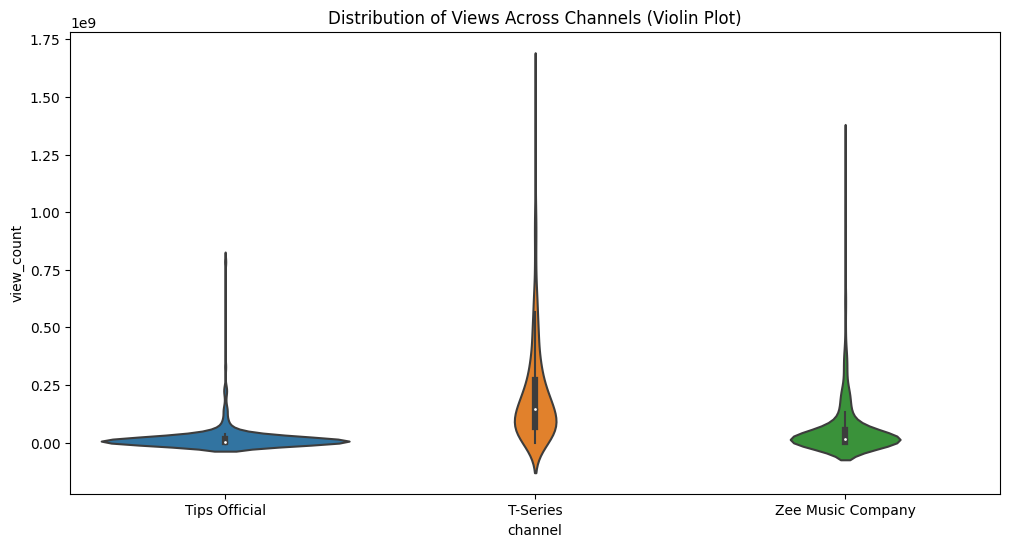

In [14]:
# Create a Violin plot using Seaborn
plt.figure(figsize=(12, 6))
sns.violinplot(x='channel', y='view_count', data=merged_df)
plt.title('Distribution of Views Across Channels (Violin Plot)')
plt.show()


**How to use Altair to create a bar chart for the top 10 most liked videos?**

In [15]:
# Convert 'like_count' to numeric type
merged_df['like_count'] = pd.to_numeric(merged_df['like_count'], errors='coerce')

# Select the top 10 most liked videos
top_liked_videos = merged_df.sort_values(by='like_count', ascending=False).head(10)

# Create an Altair bar chart
import altair as alt

alt.Chart(top_liked_videos).mark_bar().encode(
    x='like_count:Q',
    y=alt.Y('title:N', sort='-x'),
    color='channel:N',
    tooltip=['title', 'like_count', 'channel']
).properties(
    title='Top 10 Most Liked Videos'
).interactive()


alt.Chart(...)

**How to use Matplotlib to create a histogram of views for each channel?**

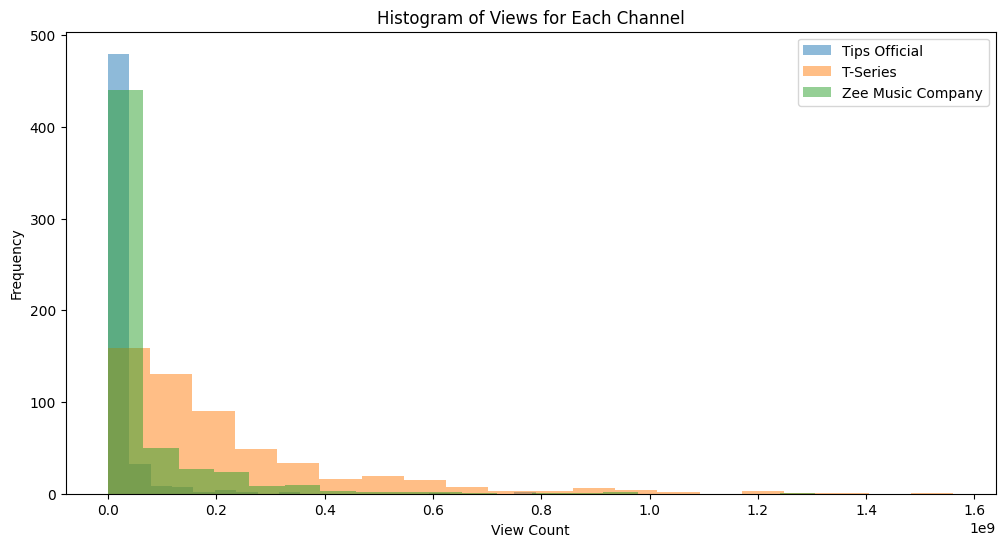

In [16]:
# Create a histogram of views for each channel
plt.figure(figsize=(12, 6))
for channel in merged_df['channel'].unique():
    plt.hist(merged_df[merged_df['channel'] == channel]['view_count'], bins=20, alpha=0.5, label=channel)

plt.legend()
plt.title('Histogram of Views for Each Channel')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()


**How to use Matplotlib to create a stacked bar chart for the total views, likes, and comments by channel?**

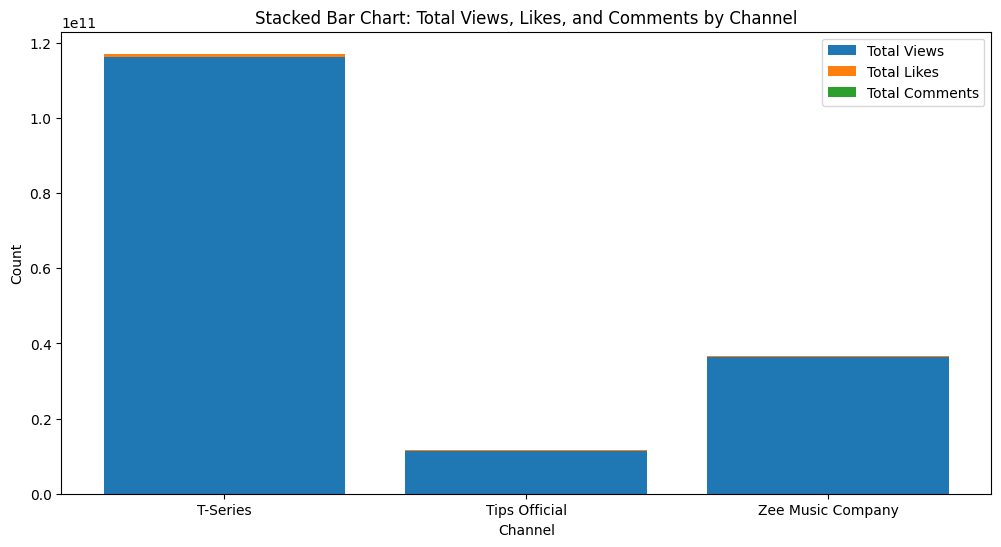

In [17]:
# Group by channel and sum views, likes, and comments
channel_metrics = merged_df.groupby('channel').agg({'view_count': 'sum', 'like_count': 'sum', 'comment_count': 'sum'}).reset_index()

# Create a stacked bar chart for total views, likes, and comments by channel
plt.figure(figsize=(12, 6))
plt.bar(channel_metrics['channel'], channel_metrics['view_count'], label='Total Views')
plt.bar(channel_metrics['channel'], channel_metrics['like_count'], bottom=channel_metrics['view_count'], label='Total Likes')
plt.bar(channel_metrics['channel'], channel_metrics['comment_count'], bottom=channel_metrics['view_count'] + channel_metrics['like_count'], label='Total Comments')

plt.legend()
plt.title('Stacked Bar Chart: Total Views, Likes, and Comments by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()


**How to use Matplotlib to create a scatter plot to explore the relationship between likes and views?**

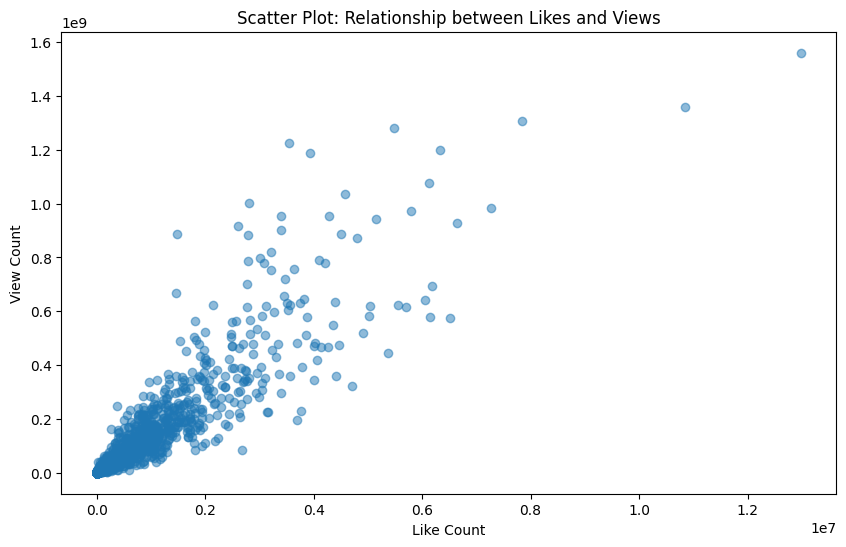

In [18]:
# Create a scatter plot to explore the relationship between likes and views
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['like_count'], merged_df['view_count'], alpha=0.5)
plt.title('Scatter Plot: Relationship between Likes and Views')
plt.xlabel('Like Count')
plt.ylabel('View Count')
plt.show()


**How to use Matplotlib to create a bar chart for the top 10 videos with the highest comment counts?**

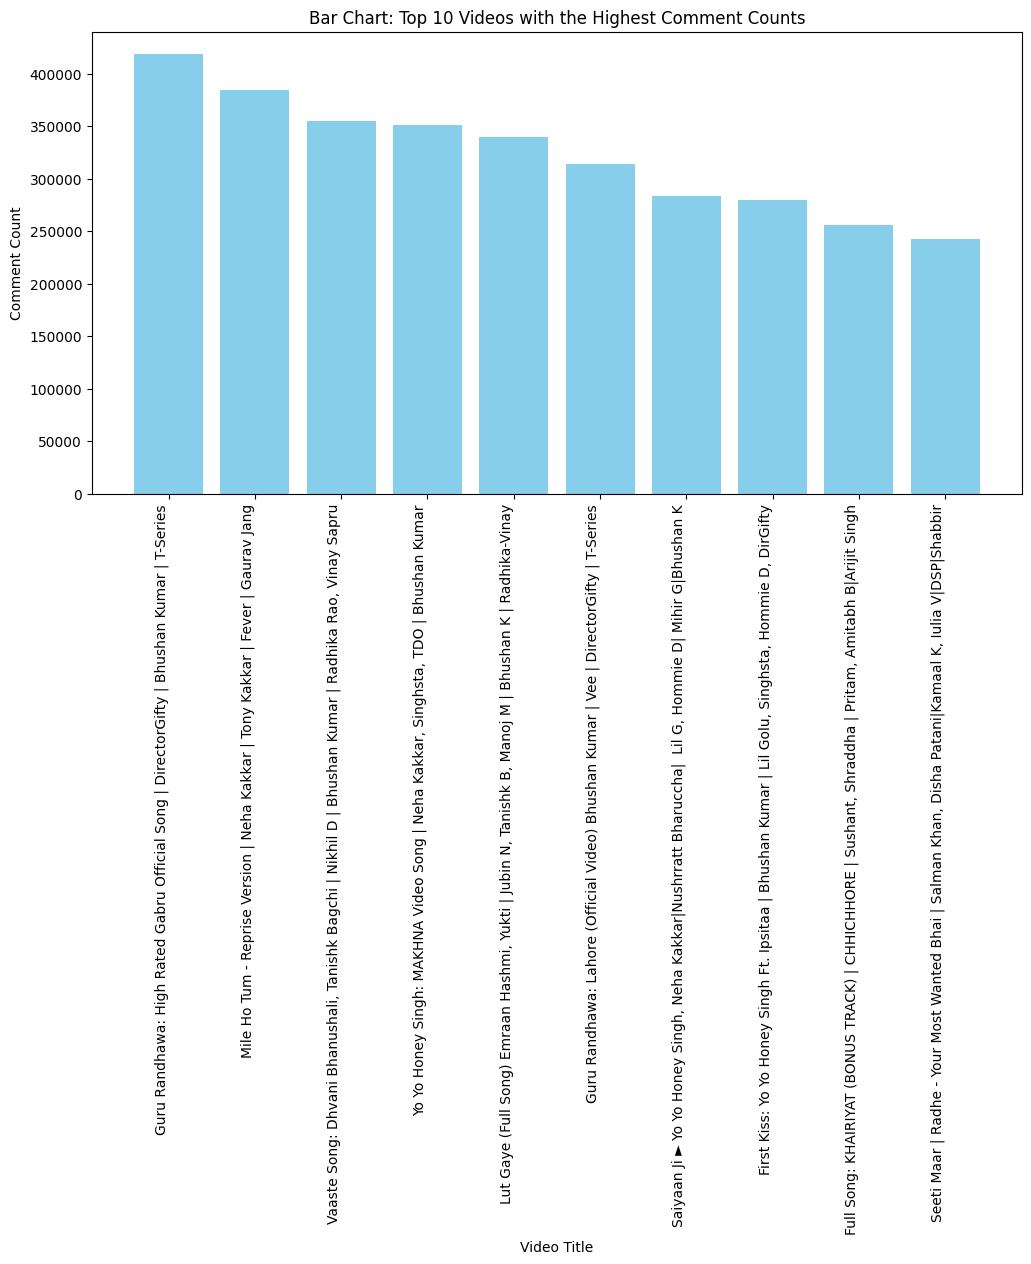

In [19]:
# Select the top 10 videos with the highest comment counts
top_commented_videos = merged_df.sort_values(by='comment_count', ascending=False).head(10)

# Create a bar chart for the top 10 videos with the highest comment counts
plt.figure(figsize=(12, 6))
plt.bar(top_commented_videos['title'], top_commented_videos['comment_count'], color='skyblue')
plt.title('Bar Chart: Top 10 Videos with the Highest Comment Counts')
plt.xlabel('Video Title')
plt.ylabel('Comment Count')
plt.xticks(rotation=90, ha='right')
plt.show()


**How to use Matplotlib to create a bar chart for the top 10 videos with the highest like-to-view ratio?**

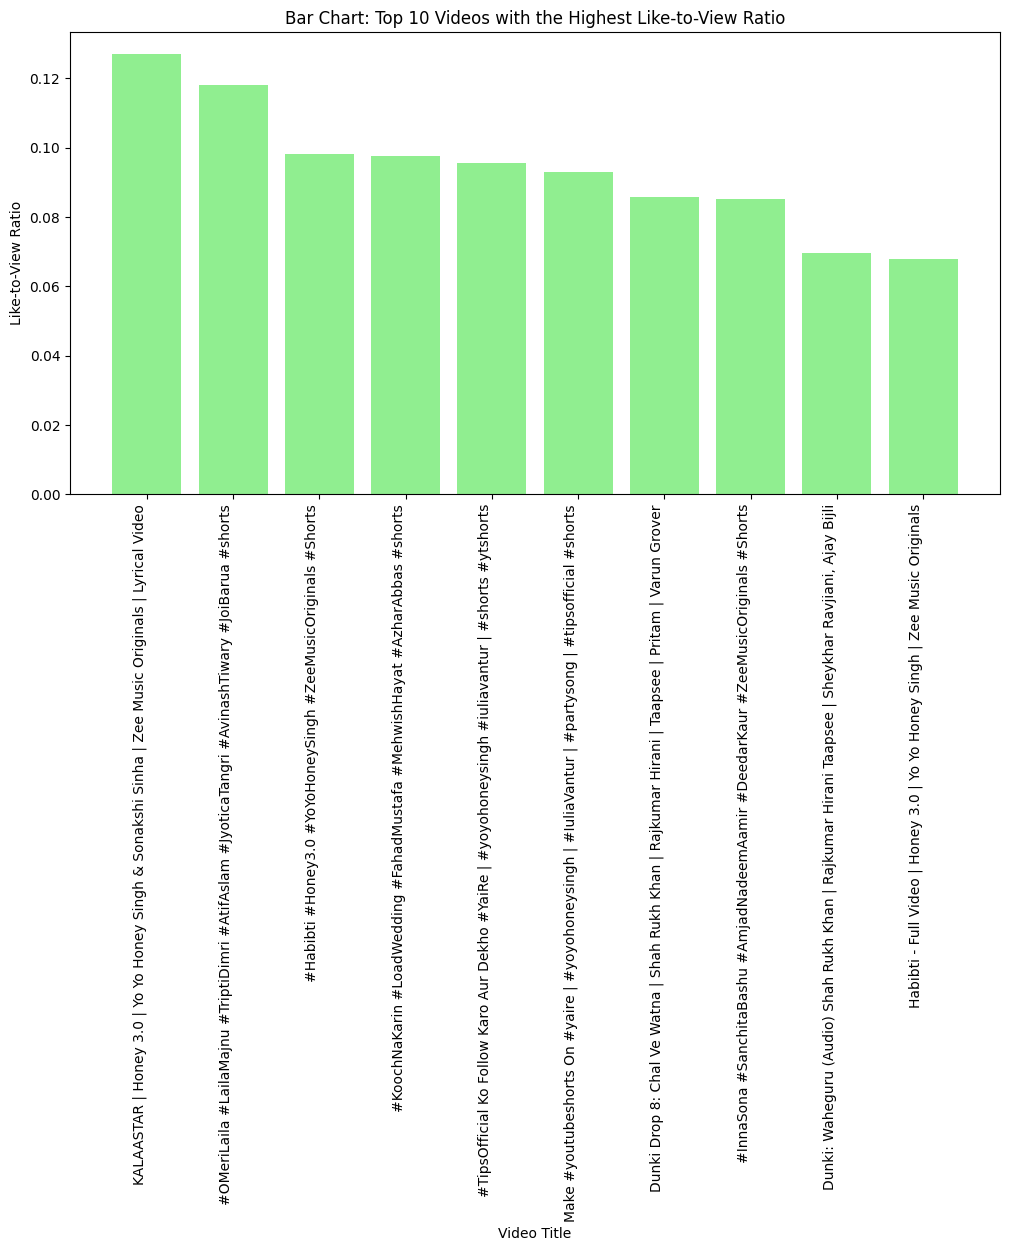

In [20]:
# Calculate like-to-view ratio for each video
merged_df['like_to_view_ratio'] = merged_df['like_count'] / merged_df['view_count']

# Select the top 10 videos with the highest like-to-view ratio
top_like_to_view_ratio_videos = merged_df.sort_values(by='like_to_view_ratio', ascending=False).head(10)

# Create a bar chart for the top 10 videos with the highest like-to-view ratio
plt.figure(figsize=(12, 6))
plt.bar(top_like_to_view_ratio_videos['title'], top_like_to_view_ratio_videos['like_to_view_ratio'], color='lightgreen')
plt.title('Bar Chart: Top 10 Videos with the Highest Like-to-View Ratio')
plt.xlabel('Video Title')
plt.ylabel('Like-to-View Ratio')
plt.xticks(rotation=90, ha='right')
plt.show()


**How to use Matplotlib to create a bar chart for the top 10 videos with the highest like-to-comment ratio?**

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 128293 (\N{FIRE}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 127932 (\N{MUSICAL SCORE}) missing from current font.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.



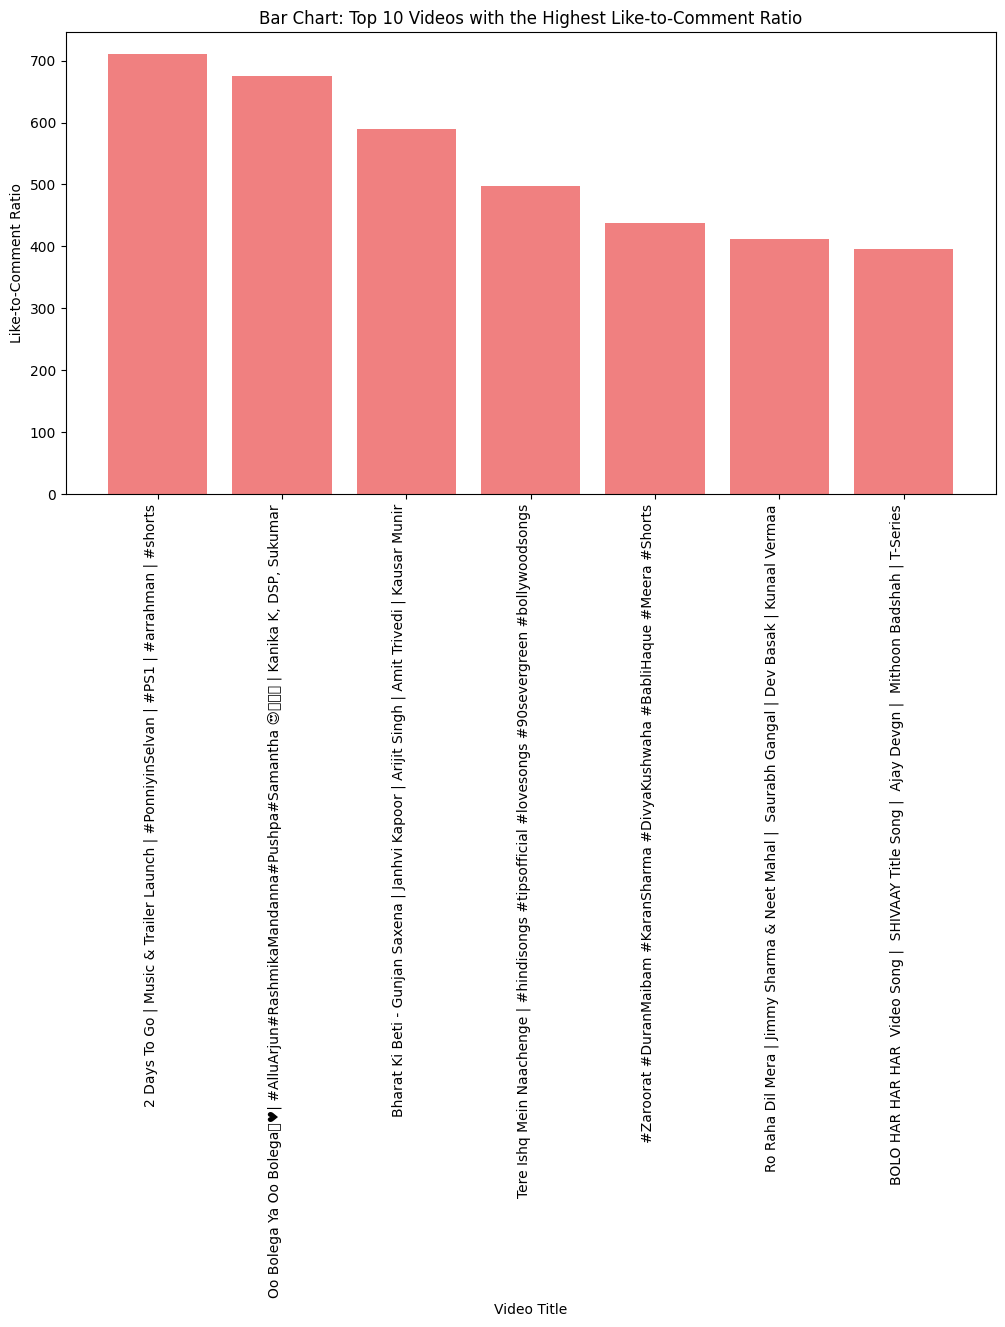

In [21]:
# Calculate like-to-comment ratio for each video
merged_df['like_to_comment_ratio'] = merged_df['like_count'] / merged_df['comment_count']

# Select the top 10 videos with the highest like-to-comment ratio
top_like_to_comment_ratio_videos = merged_df.sort_values(by='like_to_comment_ratio', ascending=False).head(10)

# Set a font that supports a wide range of characters (Noto Sans)
plt.rcParams['font.sans-serif'] = ['Noto Sans']

# Create a bar chart for the top 10 videos with the highest like-to-comment ratio
plt.figure(figsize=(12, 6))
plt.bar(top_like_to_comment_ratio_videos['title'], top_like_to_comment_ratio_videos['like_to_comment_ratio'], color='lightcoral')
plt.title('Bar Chart: Top 10 Videos with the Highest Like-to-Comment Ratio')
plt.xlabel('Video Title')
plt.ylabel('Like-to-Comment Ratio')
plt.xticks(rotation=90, ha='right')
plt.show()

